# Some Simple Pandas Plotting

Some demos on random data, just so you're aware...

And remember, plot `kind` options are:

- `bar` or `barh` for bar plots

- `hist` for histogram

- `box` for boxplot

- `kde` or `density` for density plots

- `area` for area plots

- `scatter` for scatter plots

- `hexbin` for hexagonal bin plots

- `pie` for pie plots

In [1]:
#Import our basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

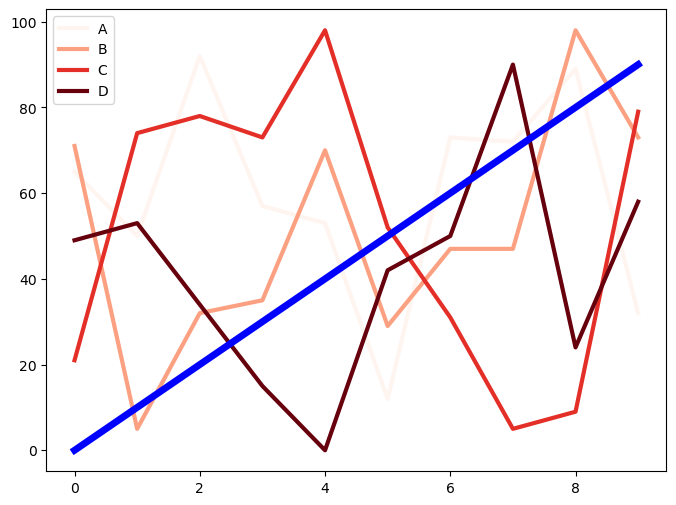

In [4]:
#Just make some random stuff:
df = pd.DataFrame(np.random.rand(10, 4).round(2)*100, columns=list("ABCD"))

#Note that we can mix in other matplotlib plotting on the same axis:
####

fig1, ax1 = plt.subplots(1,1, figsize=(8,6))
df.plot(ax = ax1, linewidth=3, cmap='Reds')

#Add some matplotlib
x = np.arange(0,10)
y = x*10
ax1.plot(x, y, linewidth=5, color='blue')

In [5]:
df

,A,B,C,D
0,65.0,71.0,21.0,49.0
1,50.0,5.0,74.0,53.0
2,92.0,32.0,78.0,34.0
3,57.0,35.0,73.0,15.0
4,53.0,70.0,98.0,0.0
5,12.0,29.0,52.0,42.0
6,73.0,47.0,31.0,50.0
7,72.0,47.0,5.0,90.0
8,89.0,98.0,9.0,24.0
9,32.0,73.0,79.0,58.0


#### Can also plot using method pd.plot.\<kind\>

In [ ]:
#Can try:
#df.plot.<TAB>


In [8]:
df.iloc[0]

A    65.0
B    71.0
C    21.0
D    49.0
Name: 0, dtype: float64

<AxesSubplot: >

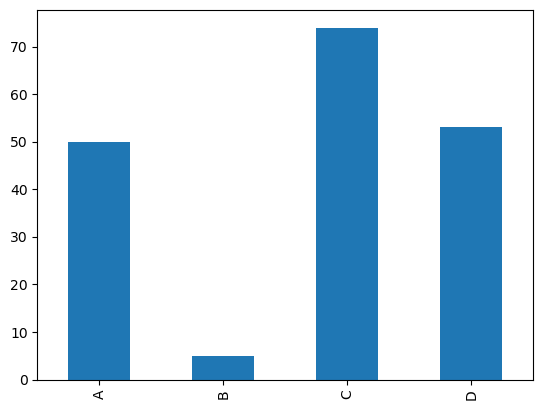

In [6]:
#Do a simple bar plot:
df.iloc[1].plot.bar()

<AxesSubplot: >

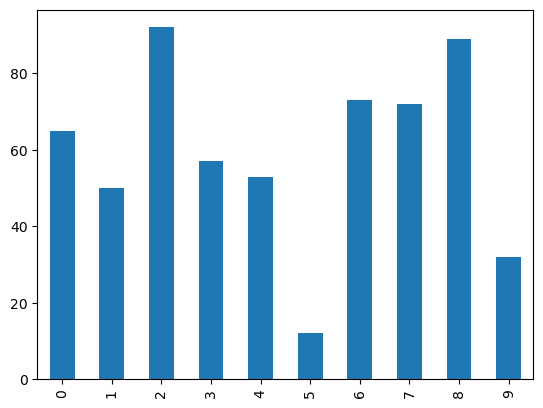

In [11]:
#Or, say:
df.loc[:,'A'].plot.bar()

<AxesSubplot: >

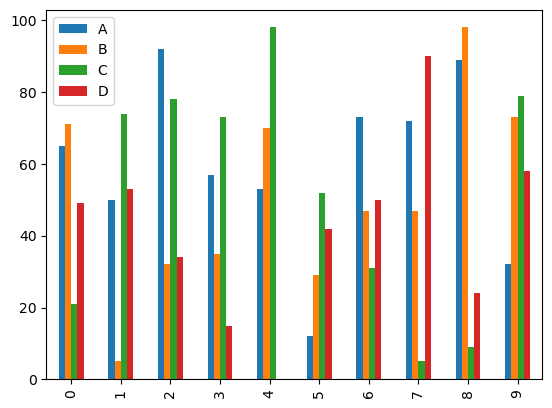

In [12]:
#Do a slightly less simple bar plot:
df.plot.bar()

<AxesSubplot: >

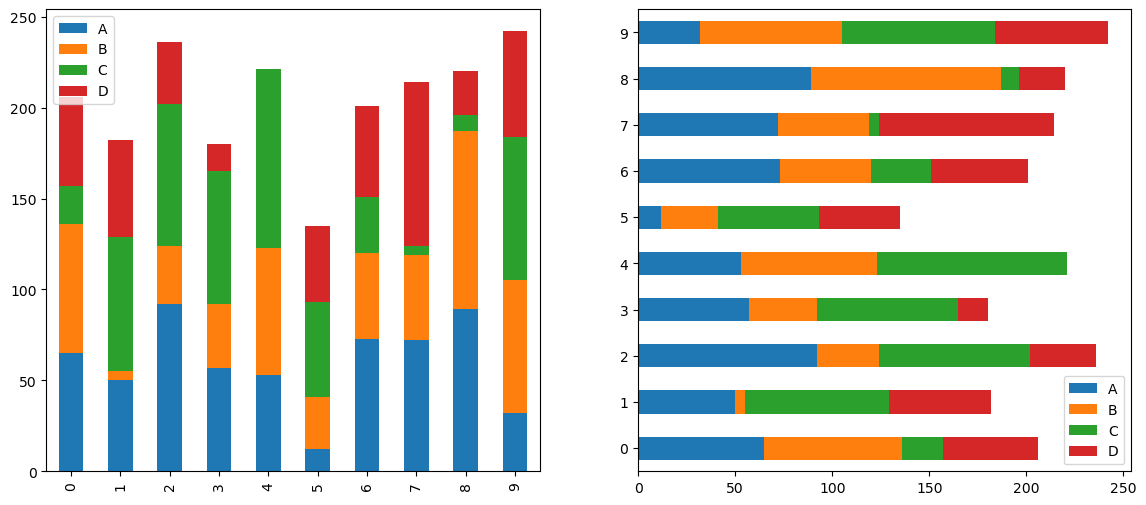

In [13]:
#To stack, or do horizontal:
fig1, ax1 = plt.subplots(1,2, figsize=(14,6))

df.plot.bar(ax = ax1[0], stacked=True)
df.plot.barh(ax = ax1[1], stacked=True)

<AxesSubplot: >

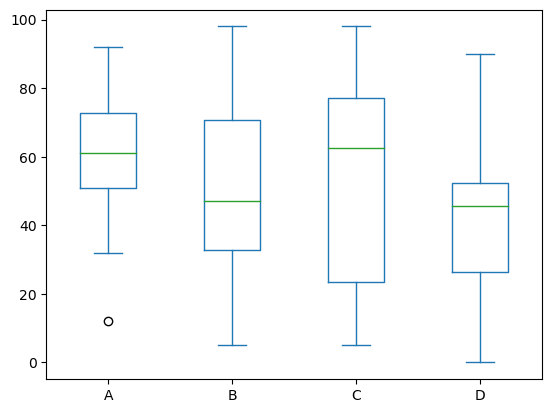

In [14]:
#Can make a boxplot:
df.plot.box()

In [15]:
#Or:
#We can also plot one column or more column, grouped by another:

#Remake df:
df = pd.DataFrame(np.random.rand(10, 4), columns=list("ABCD"))

#Set column C = 1s and then 2s
df["C"] = np.array([1]*5 + [2]*5)

df

,A,B,C,D
0,0.127798,0.609330,1,0.523727
1,0.612099,0.422650,1,0.183493
2,0.560979,0.532371,1,0.075819
3,0.544809,0.131324,1,0.227353
4,0.916462,0.566765,1,0.308336
5,0.058154,0.060330,2,0.284506
6,0.851030,0.376296,2,0.464987
7,0.824110,0.076019,2,0.644550
8,0.794375,0.739239,2,0.022774
9,0.563206,0.156539,2,0.599053


<AxesSubplot: title={'center': 'A'}, xlabel='C'>

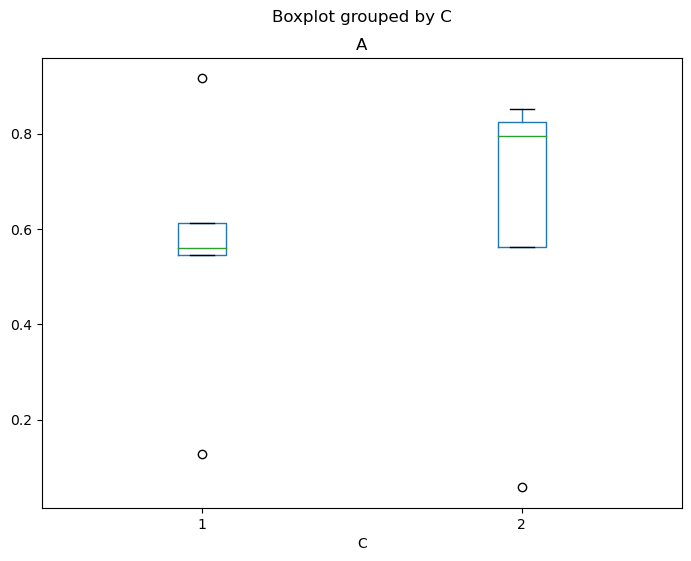

In [18]:
#And Plot:
fig1, ax1 = plt.subplots(1,1, figsize=(8,6))

df.boxplot(column = ["A"], by = "C", ax = ax1, grid=False)

#fig1.suptitle('Replace the Default');
#ax1.set_title('Replace this default too')

<AxesSubplot: >

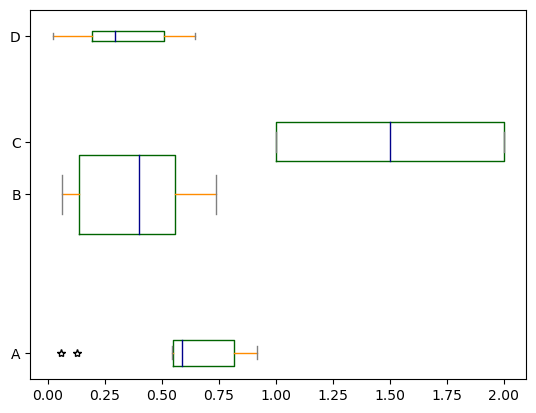

In [19]:
#Can do custom colors, positions, and widths, etc:
####

my_colors = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}

my_positions = [1, 4, 5, 7]
my_widths = [.5, 1.5, .75, .2]

df.plot.box(color = my_colors, sym='*', vert=False,
             positions=my_positions,
             widths=my_widths)

<AxesSubplot: >

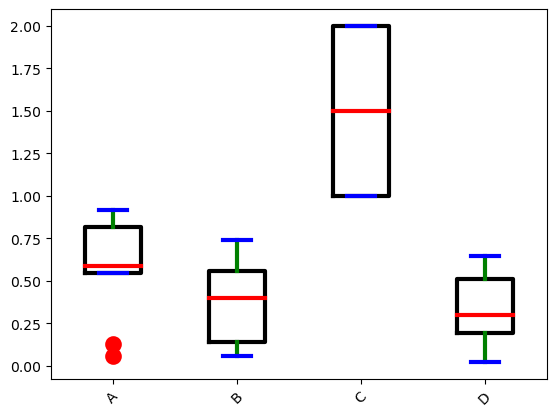

In [21]:
#And can do custom box, whisker, cap, flier, and median props:
boxprops = dict(linewidth = 3, color = 'black')
whiskerprops = dict(linestyle = '-', linewidth=3, color='green')
capprops = dict(linewidth = 3, color = 'blue')
flierprops = dict(markersize=10, markeredgewidth=2, markeredgecolor='red', markerfacecolor='red')
medianprops = dict(linewidth = 3, color = 'red')


df.boxplot(boxprops = boxprops,
            whiskerprops = whiskerprops,
            capprops = capprops,
            flierprops = flierprops,
            medianprops = medianprops,
            rot = 45, grid=False)


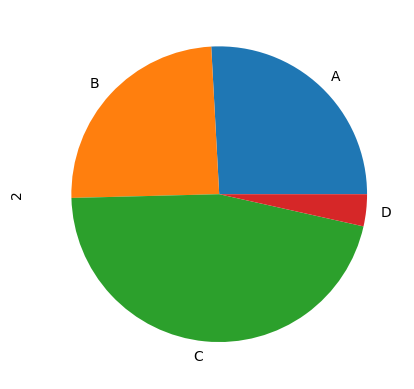

In [22]:
#Make a pie plot from a Series: y value unambiguous here (vs DataFrame)
###

df.iloc[2].plot.pie();

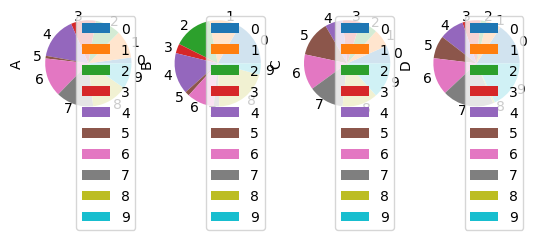

In [35]:
#From DataFrame:
#df.plot.pie(y = 0) #subplots=True);

#df.T.plot.pie(y = 0);

<AxesSubplot: ylabel='Frequency'>

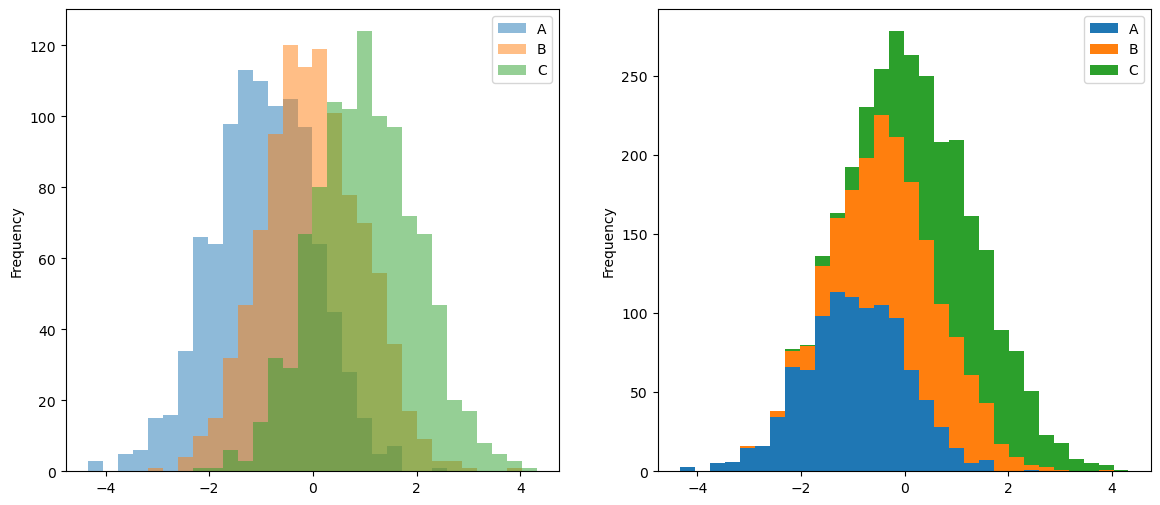

In [38]:
#Histograms, again:
####

df2 = pd.DataFrame({"A":np.random.randn(1000) - 1, "B":np.random.randn(1000), "C":np.random.randn(1000) + 1})


fig1, ax1 = plt.subplots(1,2, figsize=(14,6))

df2.plot.hist(alpha=0.5, bins=30, ax=ax1[0])
df2.plot.hist(stacked=True, bins=30, ax=ax1[1]) #orientation="horizontal"

C:\Users\steff\AppData\Local\Temp\ipykernel_13200\2916858023.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df2.hist(color="darkblue", bins=50, ax=ax1, grid=False);


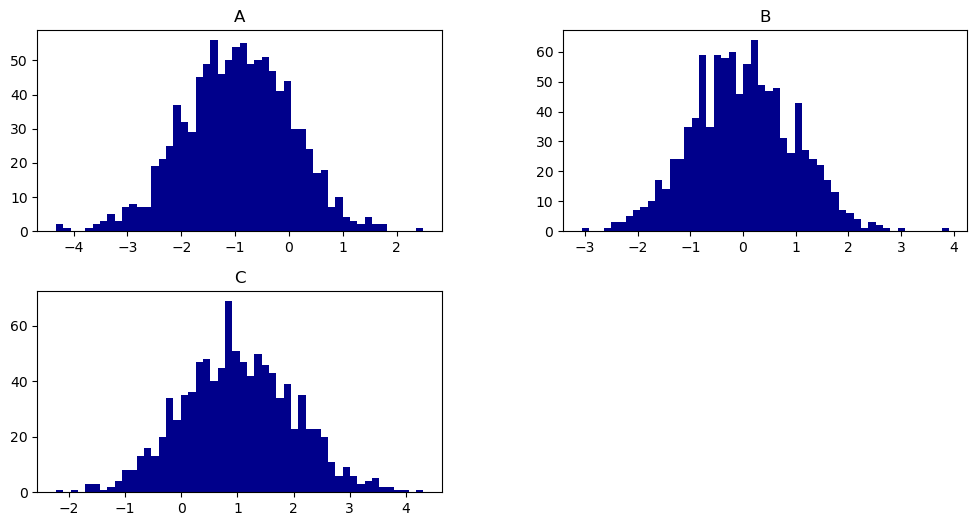

In [39]:
#Can plot on multiple subplots like so:
fig1, ax1 = plt.subplots(1,1, figsize=(12,6))

df2.hist(color="darkblue", bins=50, ax=ax1, grid=False);

<AxesSubplot: ylabel='Density'>

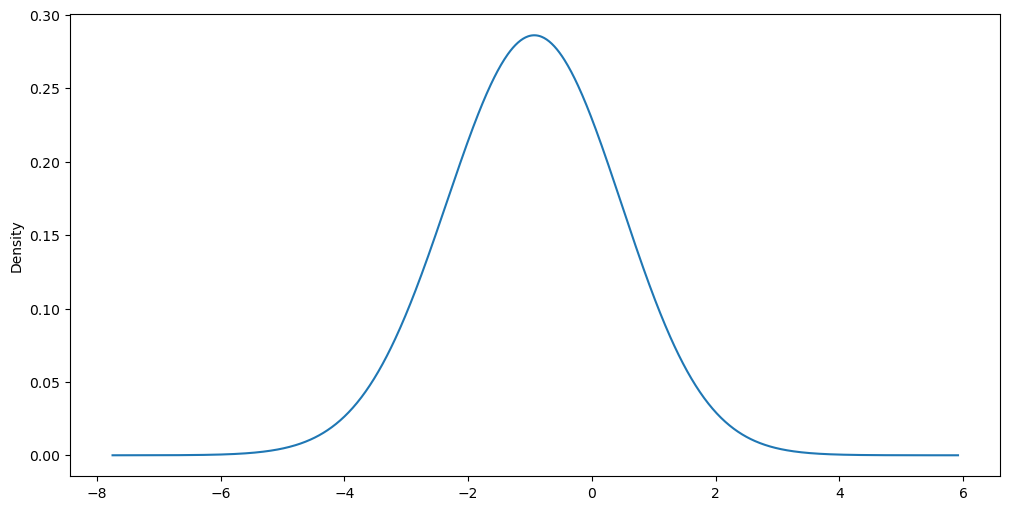

In [40]:
#Also can do a kernel density estimate:
#####
fig1, ax1 = plt.subplots(1,1, figsize=(12,6))

df2['A'].plot.kde(bw_method=1)


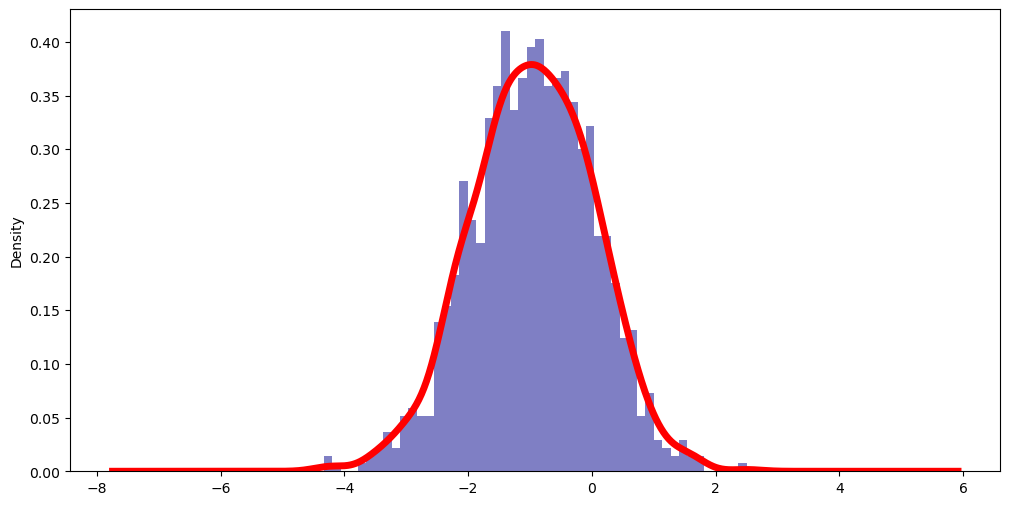

In [41]:
#Plot both histogram and kde together...
fig1, ax1 = plt.subplots(1,1, figsize=(12,6))

df2['A'].hist(color="darkblue", bins=50, ax=ax1, alpha=.5, density=True)

x = df2['A'].plot.kde(ax=ax1, linewidth=5, color='red')

Finally, the hexbin:

<AxesSubplot: xlabel='A', ylabel='B'>

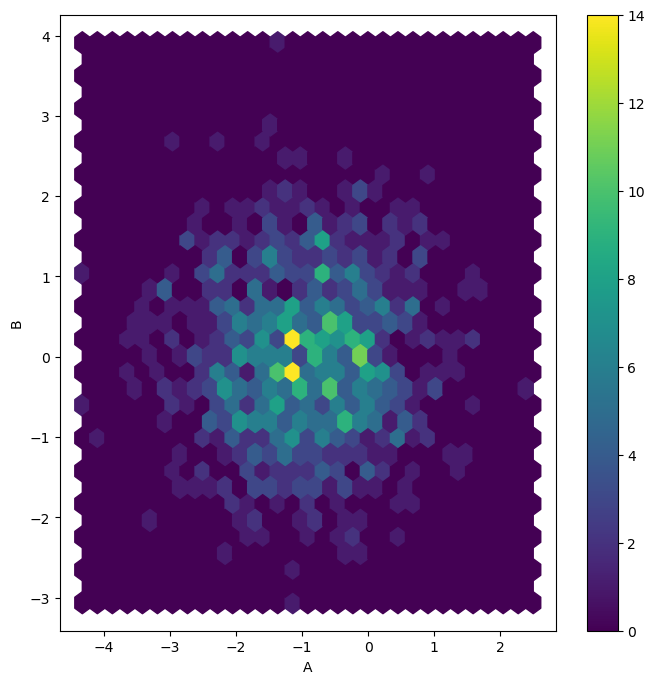

In [46]:
###Make a hexbin!

df2.plot.hexbin(x = 'A', y='B', gridsize=30, cmap='viridis', figsize=(8,8))
